# Time Series Analysis Examples
In this notebook we will be transforming and exploring time-series data from Onboard API. Make sure to run the following chunk of code first in order to install it.

How to query time-series from data points, process and visually explore them. This notebook is outlined in several YouTube videos that discuss:
- how [to load and filter time-series data](https://youtu.be/KDThdyes8kc) from sensors
- [resample and transform time-series data](https://youtu.be/VlQNGwiSSKM)
- and [create heat maps and boxplots of data](https://youtu.be/QMr0y9LOlr8) for exploration

In [3]:
import pandas as pd
from onboard.client import RtemClient

# Create the client

For this notebook, you need to use the API Key with acces to the general scope and building:read scope. Let's create the client:

In [12]:
api_key = 'ob-p-_KnPccpVFOwKvS5u_SpKixHjKKq6H1JvrzwjxISOfPiNKKZ56_EeE5ORVJOGGtx0d_k'

In [13]:
client = RtemClient(api_key=api_key)

# Load & filter data

We will be using the metadata file we obtained from Onboard API in the previous notebook. Of course you can query these points again, but let's learn how to load and filter the data using *pandas*:

In [14]:
metadata = pd.read_csv("./rtem_all_points_metadata.csv")

Let's check the data types:

In [15]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44390 entries, 0 to 44389
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_point          44390 non-null  int64  
 1   building_id       44390 non-null  int64  
 2   last_updated      44342 non-null  float64
 3   first_updated     44342 non-null  float64
 4   device            0 non-null      float64
 5   objectId          0 non-null      float64
 6   name_point        14658 non-null  object 
 7   description       31843 non-null  object 
 8   units             31687 non-null  object 
 9   tagged_units      14654 non-null  object 
 10  raw_unit_id       44390 non-null  int64  
 11  value             44274 non-null  object 
 12  type              44390 non-null  object 
 13  point_type_id     44390 non-null  int64  
 14  measurement_id    44390 non-null  int64  
 15  datasource_hash   44390 non-null  object 
 16  topic             44390 non-null  object

In [16]:
metadata.head()

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,310029,441,1.560571e+12,1.550542e+12,NaN,NaN,245 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,b115b5053493748f7076ad09f69c4456,nyserda+0000088737+boiler-1+245 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
1,310009,441,1.560485e+12,1.550701e+12,NaN,NaN,225 E 149th St. Boiler-1 Exhaust Temp,NaN,F,f,...,1,4a1a11502acee3078352da312c40c262,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
2,310010,441,1.560571e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fault Code,NaN,?,?,...,18,55882633fe8fb5aac7dac643c99b1af5,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
3,310011,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 FFWD Temp,NaN,?,?,...,18,831a8df09b848f53e807fa0204c45eaa,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"
4,310012,441,1.560485e+12,1.550504e+12,NaN,NaN,225 E 149th St. Boiler-1 Fire Rate In,NaN,?,?,...,18,aa147c829c7ed55b6e93cdbbb8b43d55,nyserda+0000088737+boiler-1+225 E 149th St. Bo...,28797,441,88737,BLR,Boiler,NaN,"['boiler', 'hvac']"


We have a lot of points here:

In [17]:
len(metadata.id_point)

44390

Let's filter out only the Zone Temperature sensors -that's the `type_id` 77, you can confirm this querying the ontology data, like we did in the previous notebook ;)- and that are Fan Coil Units:

In [18]:
Site_sensor_data = metadata[(metadata.equip_type_name == "Site Sensors")]

In [19]:
Site_sensor_data['equip_id'].unique()

array([28813, 18917, 19446, 19644, 19648, 28505, 20343, 20509, 21097,
       34990, 25961, 22331, 31248, 26970, 26597, 26598, 26599, 26600,
       26601, 26602, 26603, 26604, 26605, 26606, 26607, 26608, 26609,
       26610, 26611, 26612, 26613, 26614, 26615, 26616, 26617, 26618,
       26619, 26620, 26621, 26622, 26623, 26624, 26625, 26626, 26627,
       26628, 26629, 26630, 26631, 26632, 26633, 26634, 26635, 26636,
       26637, 26638, 26639, 26640, 26641, 26642, 26643, 26644, 26645,
       26646, 26647, 26648, 26649, 26650, 26651, 26652, 26653, 26654,
       26655, 26656, 26657, 26658, 26659, 26660, 26661, 26662, 26663,
       26664, 26665, 26666, 26667, 26668, 26669, 26670, 26671, 26672,
       26673, 26674, 26675, 26676, 26677, 26678, 26679, 26680, 26681,
       26682, 26683, 26684, 26685, 26686, 26687, 26688, 26689, 26690,
       26691, 26692, 26693, 26694, 26695, 26696, 26697, 26698, 26699,
       26700, 26701, 26702, 26703, 26716, 26717, 26718, 26719, 26720,
       26721, 26722,

In [20]:
"Outside Air Temperature" in metadata.type

False

In [21]:
OAT_mat_data = metadata[(metadata.type == "Outside Air Temperature")]
OAT_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
362,310273,441,1.603907e+12,1.588306e+12,NaN,NaN,225 E 149th St. Controller [Tekmar 284] Outdoo...,NaN,F,f,...,1,a4657d74835d29be77eae1b80865ef3c,nyserda+0000088737+site-Sensor+225 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
981,310902,441,1.609476e+12,1.570381e+12,NaN,NaN,245 E 149th St. Controller [Tekmar 284] BAS Ou...,NaN,F,f,...,1,04bc1a21b80440e5d67e05569c010a1c,nyserda+0000088737+site-Sensor+245 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
982,310903,441,1.609476e+12,1.570403e+12,NaN,NaN,245 E 149th St. Controller [Tekmar 284] Outdoo...,NaN,F,f,...,1,2278e1c5c7803bbafe675cd9219e67eb,nyserda+0000088737+site-Sensor+245 E 149th St....,28813,441,88737,SITE,Site Sensors,NaN,['site']
1313,198145,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Outdoor Air Temp,F,NaN,...,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1325,198135,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_OA Temp (Reference value),F,NaN,...,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,230936,398,1.577768e+12,1.571951e+12,NaN,NaN,NaN,Outdoor Conditions (CRAC 5-1)_OaTmp,F,NaN,...,1,54fa4adcf5c857b6e4279594fb24263b,nyserda+0000109188+Site-Sensor+Outdoor Conditi...,22732,398,109188,SITE,Site Sensors,NaN,['site']
44196,230960,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-12-4_OaTmp,F,NaN,...,1,42c03637a3e2efa6703f514f66954564,nyserda+0000109188+ac12-4+AC-12-4_OaTmp,22733,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44241,230976,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-25-1_OaTmp,F,NaN,...,1,18896da3dc788a9de84f2c5e9bcfb49a,nyserda+0000109188+ac25-1+AC-25-1_OaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44272,231006,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-4-1_OaTmp,F,NaN,...,1,bb8550c34feb8bfd3baa72726bc77e2d,nyserda+0000109188+ac4-1+AC-4-1_OaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [22]:
OAT_mat_data_140 = OAT_mat_data[OAT_mat_data['building_id'] == 140]
OAT_mat_data_140

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1313,198145,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Outdoor Air Temp,F,NaN,...,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1325,198135,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_OA Temp (Reference value),F,NaN,...,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1367,198182,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_OA Temp (Reference value),F,NaN,...,1,21615a28c7a99344f59571bd65b9eaca,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_OA Te...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1385,198233,140,1.551416e+12,1.518620e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Outdoor Air Temp,F,NaN,...,1,82fd8b24d7f37657c33d17d2eb362b9c,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1394,198224,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_OA Temp (Reference value),F,NaN,...,1,c26204f12acb843e13f3f98b98edb4ea,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1451,198271,140,1.551416e+12,1.546319e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_OA Temp (Reference value),F,NaN,...,1,fc119c412db2dcdc747b83f0b74c06b6,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_O...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1473,198308,140,1.551355e+12,1.535774e+12,NaN,NaN,NaN,Chiller Plant_OA Temp (Reference value),F,NaN,...,1,26ce2b60cd9f73e621ab6db223329d36,nyserda+0000083483+chilledWaterPlant+Chiller P...,18096,140,83483,CHWS,Chilled Water Plant,NaN,"['hvac', 'chilledWaterPlant']"
1499,198383,140,1.524542e+12,1.517461e+12,NaN,NaN,NaN,Chiller-1_Outdoor Air Temp,F,NaN,...,1,1f93784723b1ace65dc6f774108eda31,nyserda+0000083483+chiller1+Chiller-1_Outdoor ...,18099,140,83483,CH,Chiller,NaN,"['chiller', 'hvac', 'airCooling']"
1563,198442,140,1.524542e+12,1.517461e+12,NaN,NaN,NaN,Chiller-2_Outdoor Air Temp,F,NaN,...,1,2c64ae13414d3b88b4e10c667f2c8733,nyserda+0000083483+chiller2+Chiller-2_Outdoor ...,18100,140,83483,CH,Chiller,NaN,"['chiller', 'hvac', 'airCooling']"
1632,198462,140,1.551416e+12,1.535774e+12,NaN,NaN,NaN,Heating Plant_OA Temp (Reference value),F,NaN,...,1,364436cf50f651665f53004580af1063,nyserda+0000083483+hotWaterPlant+Heating Plant...,18103,140,83483,HWS,Hot Water Plant,NaN,"['hvac', 'hotWaterPlant']"


In [23]:
RAT_mat_data = metadata[(metadata.type == "Return Air Temperature")]
RAT_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1309,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,1,29a9514ea653ed9afbc43704e1230efd,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1361,198188,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,1,4d7c35460b418684bd7545239e72876c,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Retur...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1382,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,1,6b9e0ebbd36ba727bdeb4437b012b877,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1446,198277,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Return Air Temp,F,NaN,...,1,7ab8209ec890801c848af3ee4b601155,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_R...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1717,208322,248,1.585055e+12,1.581703e+12,NaN,NaN,NaN,Mid Zone 1 Tank Return Temp Sensor_Value,F,NaN,...,1,c82e7194c4eb3a129c08d26450b8ab3c,nyserda+0000116742+Site-Sensor+Mid Zone 1 Tank...,19644,248,116742,SITE,Site Sensors,NaN,['site']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44220,230982,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_RaTmp,F,NaN,...,1,95c8e3cbbd6081be1f8cb78a8e60f330,nyserda+0000109188+ac25-1+AC-25-1_RaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44253,231012,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_RaTmp,F,NaN,...,1,7354b6fd64a4fac76eeb68382dee5a42,nyserda+0000109188+ac4-1+AC-4-1_RaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44284,231043,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-9-1_RaTmp,F,NaN,...,1,e78398b47be19242f5e1a90d1ba3f96a,nyserda+0000109188+ac9-1+AC-9-1_RaTmp,22736,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44314,231060,398,1.577768e+12,1.572568e+12,NaN,NaN,NaN,AHU_26_02_RATmp,F,NaN,...,1,bfffc10825012d93407e03a93fab5a77,nyserda+0000109188+ahu26-02+AHU_26_02_RATmp,22737,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [24]:
RAT_mat_data_140 = RAT_mat_data[RAT_mat_data['building_id'] == 140]
RAT_mat_data_140

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1309,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,1,29a9514ea653ed9afbc43704e1230efd,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1361,198188,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,1,4d7c35460b418684bd7545239e72876c,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Retur...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1382,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,1,6b9e0ebbd36ba727bdeb4437b012b877,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1446,198277,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Return Air Temp,F,NaN,...,1,7ab8209ec890801c848af3ee4b601155,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_R...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [25]:
MAT_mat_data = metadata[(metadata.type == "Mixed Air Temperature")]
MAT_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1326,198131,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Mixed Air Temp,F,NaN,...,1,603cdedfc8c6efd774c2ebe9a62b33a8,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1397,198220,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Mixed Air Temp,F,NaN,...,1,3e9a73baa2a23bb6d2512641a0deda36,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2213,267505,419,1.567915e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St Mechanical Room Marymount AHU-1...,F,NaN,...,1,9cb7b76801c0073bedf1d5fea96b8110,nyserda+0000116399+ahu-1+221 E 71st St Mechani...,25962,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2227,267522,419,1.567916e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St AHU-10 Mixed Air Temp,F,NaN,...,1,273ce8975e94a7567937781e039e695a,nyserda+0000116399+ahu-10+221 E 71st St AHU-10...,25963,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
2244,267544,419,1.567916e+12,1.551967e+12,NaN,NaN,NaN,221 E 71st St AHU-2 Mixed Air Temp,F,NaN,...,1,cb3f889c867ebee5f0e305ebe6442dc1,nyserda+0000116399+ahu-2+221 E 71st St AHU-2 M...,25964,419,116399,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43009,230341,394,1.546318e+12,1.514783e+12,NaN,NaN,NaN,HVAC F2 MAT,F,NaN,...,1,762f3ba85b0c7b55c64b964acd8ce7cb,nyserda+0000080880+fan2-supply+HVAC F2 MAT,22674,394,80880,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
43022,230356,394,1.546318e+12,1.514783e+12,NaN,NaN,NaN,HVAC F20 MATemp,F,NaN,...,1,a6633af055754d6455fa652973507b59,nyserda+0000080880+fan20-supply+HVAC F20 MATemp,22675,394,80880,FAN,Fan,NaN,"['fan', 'hvac', 'supplyFan']"
44243,230969,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_MaTmp,F,NaN,...,1,0333f2263b2291bdb6e8d511e8ae47da,nyserda+0000109188+ac25-1+AC-25-1_MaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44260,231000,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_MaTmp,F,NaN,...,1,5bc07319ee8a1f22dec9f34ad698d934,nyserda+0000109188+ac4-1+AC-4-1_MaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [26]:
MAT_mat_data_140 = MAT_mat_data[MAT_mat_data['building_id'] == 140]
MAT_mat_data_140

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1326,198131,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Mixed Air Temp,F,NaN,...,1,603cdedfc8c6efd774c2ebe9a62b33a8,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1397,198220,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Mixed Air Temp,F,NaN,...,1,3e9a73baa2a23bb6d2512641a0deda36,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [27]:
shared_OAT_mat_data = OAT_mat_data[OAT_mat_data["building_id"].isin(RAT_mat_data["building_id"])]
shared_RAT_mat_data  = RAT_mat_data[RAT_mat_data["building_id"].isin(OAT_mat_data["building_id"])]
shared_MAT_mat_data  = MAT_mat_data[MAT_mat_data["building_id"].isin(OAT_mat_data["building_id"])]

In [16]:
shared_OAT_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1313,198145,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Outdoor Air Temp,F,NaN,...,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1325,198135,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_OA Temp (Reference value),F,NaN,...,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1367,198182,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_OA Temp (Reference value),F,NaN,...,1,21615a28c7a99344f59571bd65b9eaca,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_OA Te...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1385,198233,140,1.551416e+12,1.518620e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Outdoor Air Temp,F,NaN,...,1,82fd8b24d7f37657c33d17d2eb362b9c,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1394,198224,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_OA Temp (Reference value),F,NaN,...,1,c26204f12acb843e13f3f98b98edb4ea,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44192,230936,398,1.577768e+12,1.571951e+12,NaN,NaN,NaN,Outdoor Conditions (CRAC 5-1)_OaTmp,F,NaN,...,1,54fa4adcf5c857b6e4279594fb24263b,nyserda+0000109188+Site-Sensor+Outdoor Conditi...,22732,398,109188,SITE,Site Sensors,NaN,['site']
44196,230960,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-12-4_OaTmp,F,NaN,...,1,42c03637a3e2efa6703f514f66954564,nyserda+0000109188+ac12-4+AC-12-4_OaTmp,22733,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44241,230976,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-25-1_OaTmp,F,NaN,...,1,18896da3dc788a9de84f2c5e9bcfb49a,nyserda+0000109188+ac25-1+AC-25-1_OaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44272,231006,398,1.577768e+12,1.554932e+12,NaN,NaN,NaN,AC-4-1_OaTmp,F,NaN,...,1,bb8550c34feb8bfd3baa72726bc77e2d,nyserda+0000109188+ac4-1+AC-4-1_OaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [17]:
shared_RAT_mat_data

,id_point,building_id,last_updated,first_updated,device,objectId,name_point,description,units,tagged_units,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
1309,198149,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-1 AH-1 Gallery_Return Air Temp,F,NaN,...,1,29a9514ea653ed9afbc43704e1230efd,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1361,198188,140,1.551416e+12,1.509509e+12,NaN,NaN,NaN,AH-1 Lobby_Return Air Temp,F,NaN,...,1,4d7c35460b418684bd7545239e72876c,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_Retur...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1382,198237,140,1.551416e+12,1.536258e+12,NaN,NaN,NaN,UPCM-2 AH-2 2nd Floor_Return Air Temp,F,NaN,...,1,6b9e0ebbd36ba727bdeb4437b012b877,nyserda+0000083483+ahu2-floor2+UPCM-2 AH-2 2nd...,18094,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1446,198277,140,1.551416e+12,1.536592e+12,NaN,NaN,NaN,AHU-2-6TH-FLR_Return Air Temp,F,NaN,...,1,7ab8209ec890801c848af3ee4b601155,nyserda+0000083483+ahu2-floor6+AHU-2-6TH-FLR_R...,18095,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
1939,210910,271,1.551416e+12,1.527826e+12,NaN,NaN,NaN,3RD FL CSC_Return Air Temp,F,NaN,...,1,efd7b65c5c1670952dea0f90a6d509d4,nyserda+0000080324+csc3+3RD FL CSC_Return Air ...,20109,271,80324,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44220,230982,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-25-1_RaTmp,F,NaN,...,1,95c8e3cbbd6081be1f8cb78a8e60f330,nyserda+0000109188+ac25-1+AC-25-1_RaTmp,22734,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44253,231012,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-4-1_RaTmp,F,NaN,...,1,7354b6fd64a4fac76eeb68382dee5a42,nyserda+0000109188+ac4-1+AC-4-1_RaTmp,22735,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44284,231043,398,1.577768e+12,1.554845e+12,NaN,NaN,NaN,AC-9-1_RaTmp,F,NaN,...,1,e78398b47be19242f5e1a90d1ba3f96a,nyserda+0000109188+ac9-1+AC-9-1_RaTmp,22736,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
44314,231060,398,1.577768e+12,1.572568e+12,NaN,NaN,NaN,AHU_26_02_RATmp,F,NaN,...,1,bfffc10825012d93407e03a93fab5a77,nyserda+0000109188+ahu26-02+AHU_26_02_RATmp,22737,398,109188,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


# Querying time-series: Boiler Heating Hot Water Supply Temp

Now that we have our metadata filtered it's time to get the time-series of those points. Let's import the libraries we will be using:

In [32]:
from datetime import datetime, timezone, timedelta
import pytz
from onboard.client.models import TimeseriesQuery, PointData
from onboard.client.dataframes import points_df_from_streaming_timeseries

First, create a list with the points to query. We already filtered our dataset, so it's all the points there:

In [39]:
OAT_points = list(OAT_mat_data_140.id_point)
RAT_points = list(RAT_mat_data_140.id_point)
MAT_points = list(MAT_mat_data_140.id_point)

Let's inspect the datetime period we are working with; we have to convert the `first_updated` and `last_updated` from unix timestamp to a datetime (like we learned in a previous notebook).

In [40]:
shared_OAT_mat_data.first_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).min()

Timestamp('2017-03-22 04:00:00+0000', tz='UTC')

In [41]:
shared_OAT_mat_data.last_updated.apply(lambda x: datetime.fromtimestamp(x/1000, timezone.utc)).max()

Timestamp('2022-01-06 23:45:00+0000', tz='UTC')

Ok, 2017-2018. Let's select a year of data; we are using the [python library datetime](https://docs.python.org/3/library/datetime.html) to create datetime objects. Remember that all the data from the API is in UTC, you have to localize all your datetimes using [PyTZ](https://pythonhosted.org/pytz/) a library designed for that purpose.

In [42]:
# Select your timezone
tz = pytz.timezone('UTC')

# Select your date and time (time is optional)
start = datetime(2017,3,22,0,0,0).replace(tzinfo=tz)
end = datetime(2022,1,6,0,0,0).replace(tzinfo=tz)

print(f"from {start} to {end}")

from 2017-03-22 00:00:00+00:00 to 2022-01-06 00:00:00+00:00


And create the query with all the parameters. Here we are saying "give me the readings fron 20 january 2017 to 20 january 2018 of the points in `points`":

In [43]:
timeseries_query_OAT = TimeseriesQuery(point_ids = OAT_points, start = start, end = end)
timeseries_query_RAT = TimeseriesQuery(point_ids = RAT_points, start = start, end = end)
timeseries_query_MAT = TimeseriesQuery(point_ids = MAT_points, start = start, end = end)

Time to get the data!

In [44]:
# Exceute query (will return and object)
query_results_OAT = client.stream_point_timeseries(timeseries_query_OAT)
query_results_RAT = client.stream_point_timeseries(timeseries_query_RAT)
query_results_MAT = client.stream_point_timeseries(timeseries_query_MAT)

# Convert to dataframe
data_OAT = points_df_from_streaming_timeseries(query_results_OAT)
data_RAT = points_df_from_streaming_timeseries(query_results_RAT)
data_MAT = points_df_from_streaming_timeseries(query_results_MAT)

In [ ]:
data_OAT

In [ ]:
data_RAT

In [45]:
data_MAT

,timestamp,198131,198220
0,2017-11-01T04:00:00Z,None,None
1,2017-11-01T04:15:00Z,None,None
2,2017-11-01T04:30:00Z,None,None
3,2017-11-01T04:45:00Z,None,None
4,2017-11-01T05:00:00Z,None,None
...,...,...,...
33490,2019-03-01T03:45:00Z,None,None
33491,2019-03-01T04:00:00Z,None,None
33492,2019-03-01T04:15:00Z,None,None
33493,2019-03-01T04:30:00Z,None,None


Took some time to retreive that data, is a big dataset. Let's export the csv:

In [47]:
data_OAT.to_csv("Outdoor_air_temperature_140_time_series.csv", index=False)
data_RAT.to_csv("Return_air_temperature_140_time_series.csv", index=False)
data_MAT.to_csv("Mixed_air_temperature_140_time_series.csv", index=False)

# Resampling

Let's load the dataset we just exported just to learn one more trick:

In [48]:
data_DSP = pd.read_csv("./Outdoor_air_temperature_140_time_series.csv")
data_DSP_setpoint = pd.read_csv("./Return_air_temperature_140_time_series.csv")
data_MAT = pd.read_csv("./Mixed_air_temperature_140_time_series.csv")

In [49]:
data_DSP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41696 entries, 0 to 41695
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  41696 non-null  object 
 1   198442     7843 non-null   float64
 2   198462     16197 non-null  float64
 3   198135     14223 non-null  float64
 4   198145     0 non-null      float64
 5   198182     14223 non-null  float64
 6   198233     0 non-null      float64
 7   198224     14223 non-null  float64
 8   198271     5650 non-null   float64
 9   198308     16125 non-null  float64
 10  198383     7843 non-null   float64
dtypes: float64(10), object(1)
memory usage: 3.5+ MB


In [31]:
data_DSP_setpoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33464 entries, 0 to 33463
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  33464 non-null  object 
 1   198237     9575 non-null   float64
 2   198277     9122 non-null   float64
 3   198149     9575 non-null   float64
 4   198188     33464 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.3+ MB


The timestamp there is not a datetime object yet. We could have parsed it as date [using the parameter `parse_dates` while reading](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) the csv or we can do the following:

In [32]:
data_DSP["timestamp"] = pd.to_datetime(data_DSP['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')
data_DSP_setpoint["timestamp"] = pd.to_datetime(data_DSP_setpoint['timestamp'], format='%Y-%m-%dT%H:%M:%S.%f')

In [33]:
type(data_DSP.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
data_DSP.head(10)

,timestamp,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
0,2017-11-01 04:00:00+00:00,NaN,NaN,51.6,NaN,51.6,NaN,51.6,NaN,NaN,NaN
1,2017-11-01 04:15:00+00:00,NaN,NaN,51.4,NaN,51.4,NaN,51.4,NaN,NaN,NaN
2,2017-11-01 04:30:00+00:00,NaN,NaN,51.1,NaN,51.1,NaN,51.1,NaN,NaN,NaN
3,2017-11-01 04:45:00+00:00,NaN,NaN,50.9,NaN,50.9,NaN,50.9,NaN,NaN,NaN
4,2017-11-01 05:00:00+00:00,NaN,NaN,50.7,NaN,50.7,NaN,50.7,NaN,NaN,NaN
5,2017-11-01 05:15:00+00:00,NaN,NaN,50.7,NaN,50.7,NaN,50.7,NaN,NaN,NaN
6,2017-11-01 05:30:00+00:00,NaN,NaN,50.5,NaN,50.5,NaN,50.5,NaN,NaN,NaN
7,2017-11-01 05:45:00+00:00,NaN,NaN,50.5,NaN,50.5,NaN,50.5,NaN,NaN,NaN
8,2017-11-01 06:00:00+00:00,NaN,NaN,50.4,NaN,50.4,NaN,50.4,NaN,NaN,NaN
9,2017-11-01 06:15:00+00:00,NaN,NaN,50.2,NaN,50.2,NaN,50.2,NaN,NaN,NaN


In [35]:
data_DSP_setpoint.head(10)

,timestamp,198237,198277,198149,198188
0,2017-11-01 04:00:00+00:00,NaN,NaN,NaN,74.6
1,2017-11-01 04:15:00+00:00,NaN,NaN,NaN,75.1
2,2017-11-01 04:30:00+00:00,NaN,NaN,NaN,73.8
3,2017-11-01 04:45:00+00:00,NaN,NaN,NaN,75.6
4,2017-11-01 05:00:00+00:00,NaN,NaN,NaN,75.6
5,2017-11-01 05:15:00+00:00,NaN,NaN,NaN,74.3
6,2017-11-01 05:30:00+00:00,NaN,NaN,NaN,73.5
7,2017-11-01 05:45:00+00:00,NaN,NaN,NaN,73.9
8,2017-11-01 06:00:00+00:00,NaN,NaN,NaN,71.4
9,2017-11-01 06:15:00+00:00,NaN,NaN,NaN,71.0


In [36]:
data_DSP.resample('D', on="timestamp").mean()

,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
timestamp,,,,,,,,,,
2017-11-01 00:00:00+00:00,NaN,NaN,54.027500,NaN,54.027500,NaN,54.027500,NaN,NaN,NaN
2017-11-02 00:00:00+00:00,NaN,NaN,63.516667,NaN,63.516667,NaN,63.516667,NaN,NaN,NaN
2017-11-03 00:00:00+00:00,NaN,NaN,67.467708,NaN,67.467708,NaN,67.467708,NaN,NaN,NaN
2017-11-04 00:00:00+00:00,NaN,NaN,56.255319,NaN,56.255319,NaN,56.255319,NaN,NaN,NaN
2017-11-05 00:00:00+00:00,NaN,NaN,58.132967,NaN,58.132967,NaN,58.132967,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-02-25 00:00:00+00:00,NaN,40.854167,40.854167,NaN,40.854167,NaN,40.854167,40.854167,40.854167,NaN
2019-02-26 00:00:00+00:00,NaN,30.333333,30.333333,NaN,30.333333,NaN,30.333333,30.333333,30.333333,NaN
2019-02-27 00:00:00+00:00,NaN,26.510417,26.510417,NaN,26.510417,NaN,26.510417,26.510417,26.510417,NaN


And you can do it with the frequency you want. Let's try 1 Hour ("H" is 1 Hour):

In [37]:
data_DSP.resample('H', on="timestamp").mean()

,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
timestamp,,,,,,,,,,
2017-11-01 04:00:00+00:00,NaN,NaN,51.25,NaN,51.25,NaN,51.25,NaN,NaN,NaN
2017-11-01 05:00:00+00:00,NaN,NaN,50.60,NaN,50.60,NaN,50.60,NaN,NaN,NaN
2017-11-01 06:00:00+00:00,NaN,NaN,50.25,NaN,50.25,NaN,50.25,NaN,NaN,NaN
2017-11-01 07:00:00+00:00,NaN,NaN,50.05,NaN,50.05,NaN,50.05,NaN,NaN,NaN
2017-11-01 08:00:00+00:00,NaN,NaN,49.95,NaN,49.95,NaN,49.95,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-03-01 00:00:00+00:00,NaN,33.0,33.00,NaN,33.00,NaN,33.00,33.0,NaN,NaN
2019-03-01 01:00:00+00:00,NaN,32.0,32.00,NaN,32.00,NaN,32.00,32.0,NaN,NaN
2019-03-01 02:00:00+00:00,NaN,32.0,32.00,NaN,32.00,NaN,32.00,32.0,NaN,NaN


That weird "T" -that means "minutes"- is an [offset alias. You can check all of them out here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

# Plotting

## Lineplots

We are going to explore our sensors data with some simple lineplots. We are going to use [*Seaborn*](https://seaborn.pydata.org/) which works on [*Matplotlib*](https://matplotlib.org/stable/users/index.html). Let's import them:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# This is for the visual stype, I like "ggplot"
plt.style.use('ggplot')

# This for the figure size
plt.rcParams["figure.figsize"] = (20,9)

Let's plot the raw data of our sensors:

In [39]:
# These are the sensors, one per column (first one is the timestamp)
cols = data_DSP.columns[1:]
cols

Index(['198442', '198462', '198135', '198145', '198182', '198233', '198224',
       '198271', '198308', '198383'],
      dtype='object')

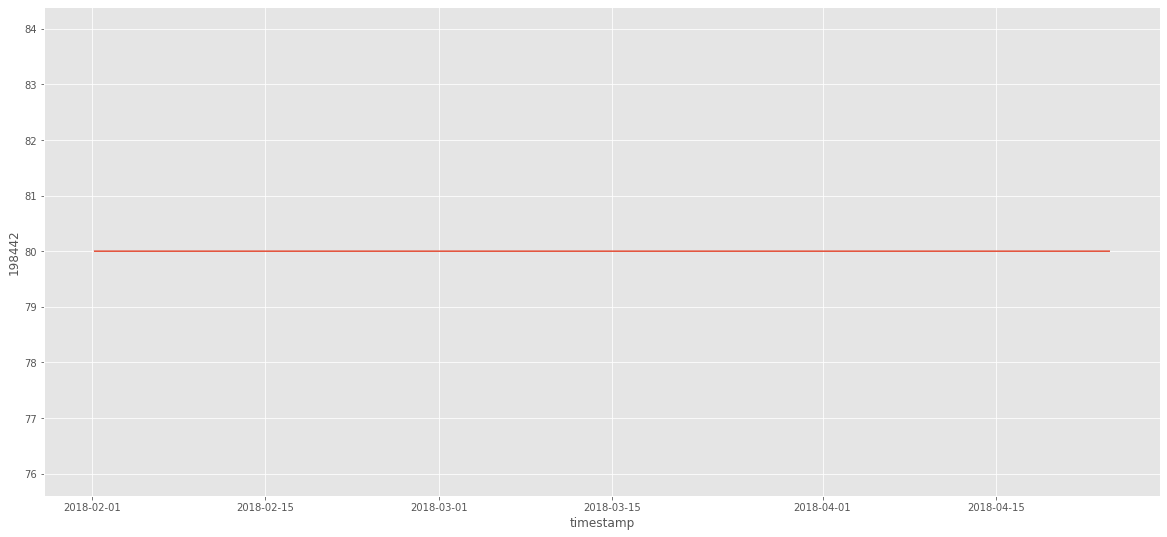

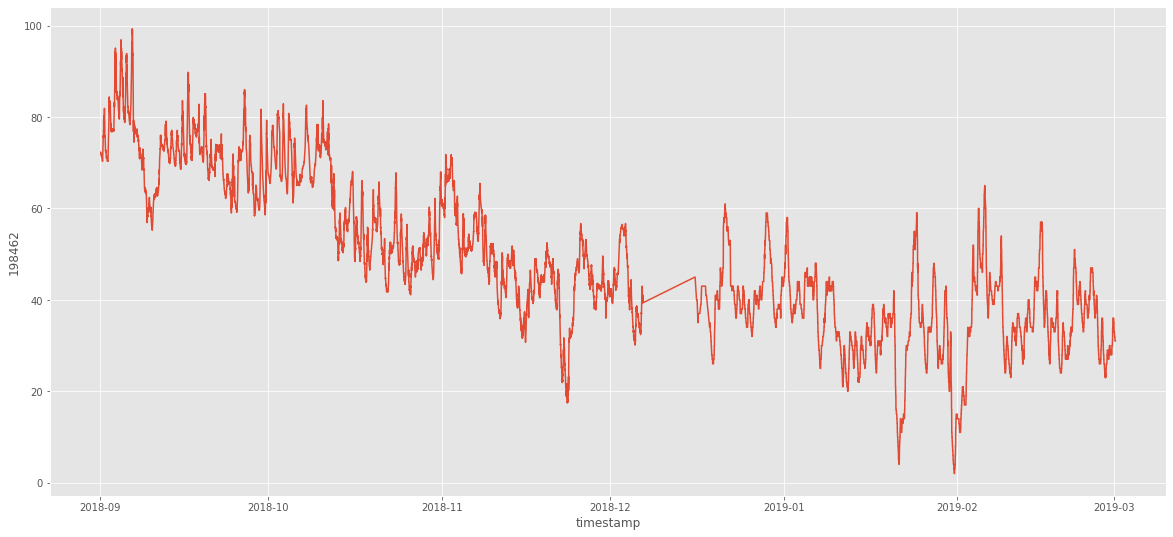

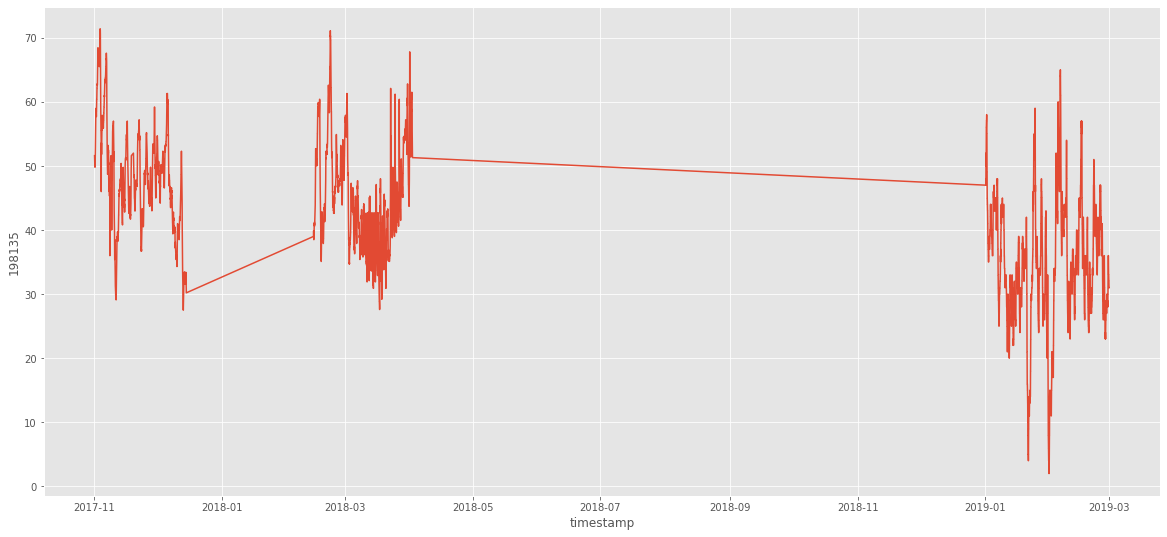

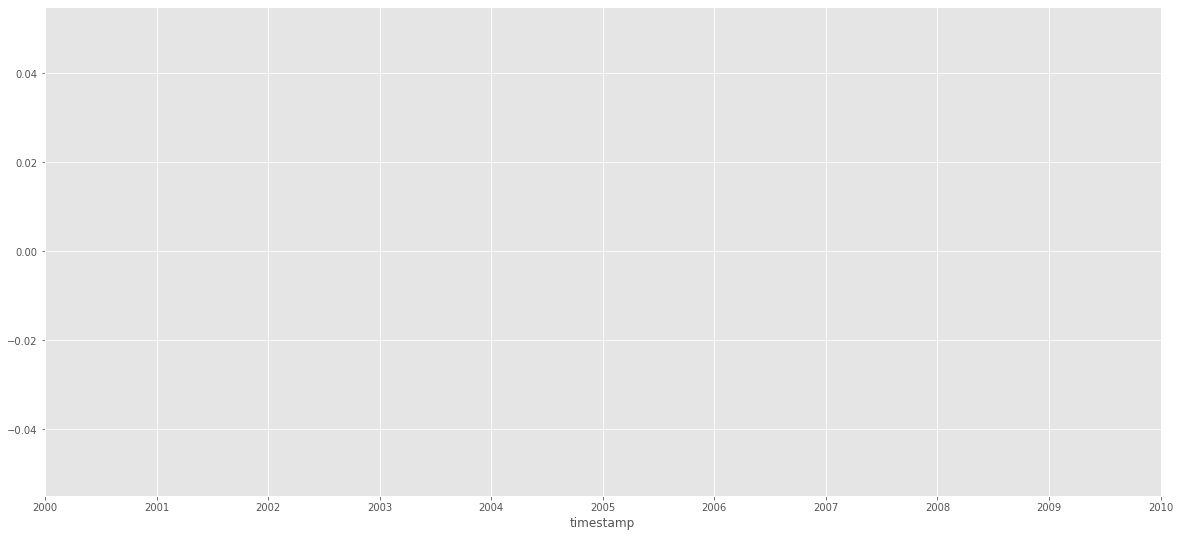

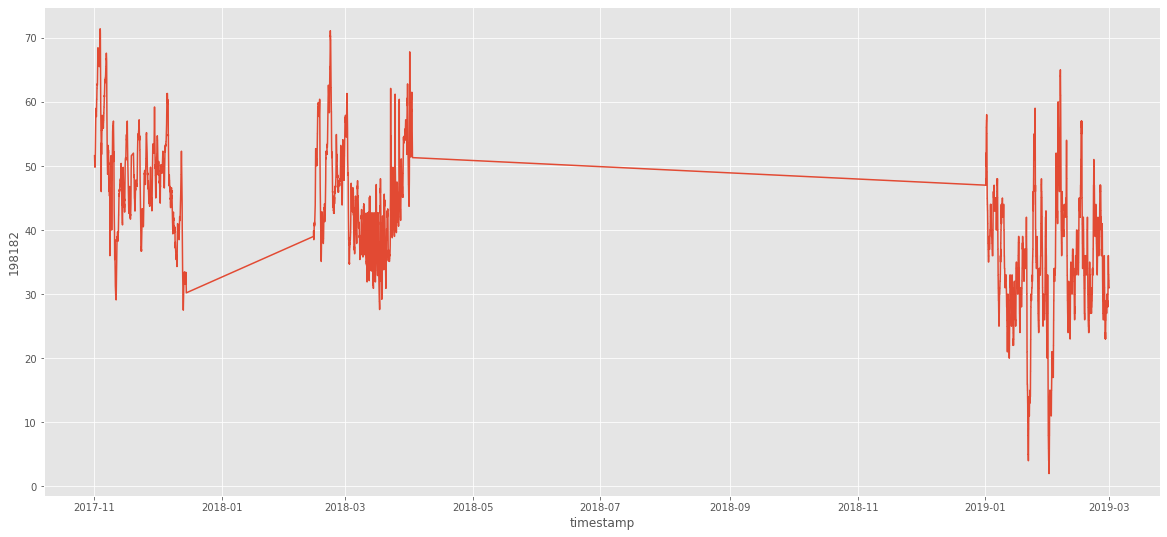

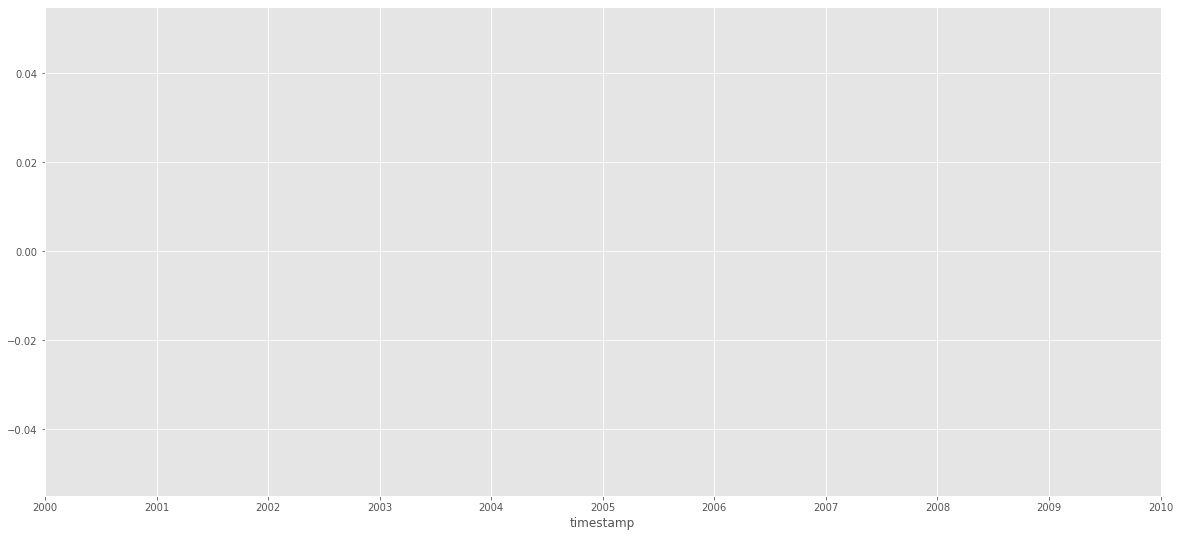

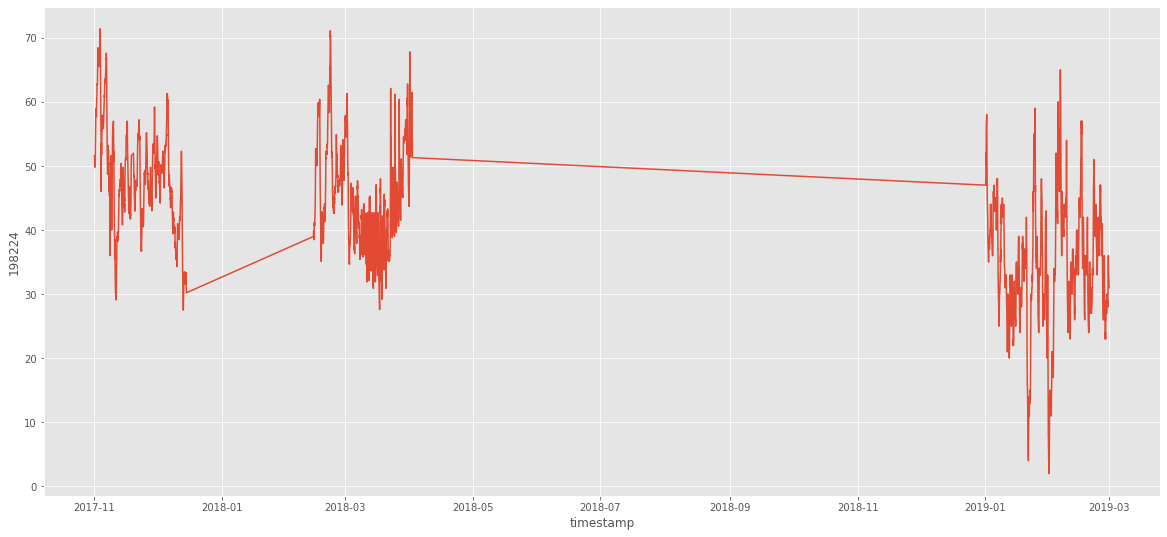

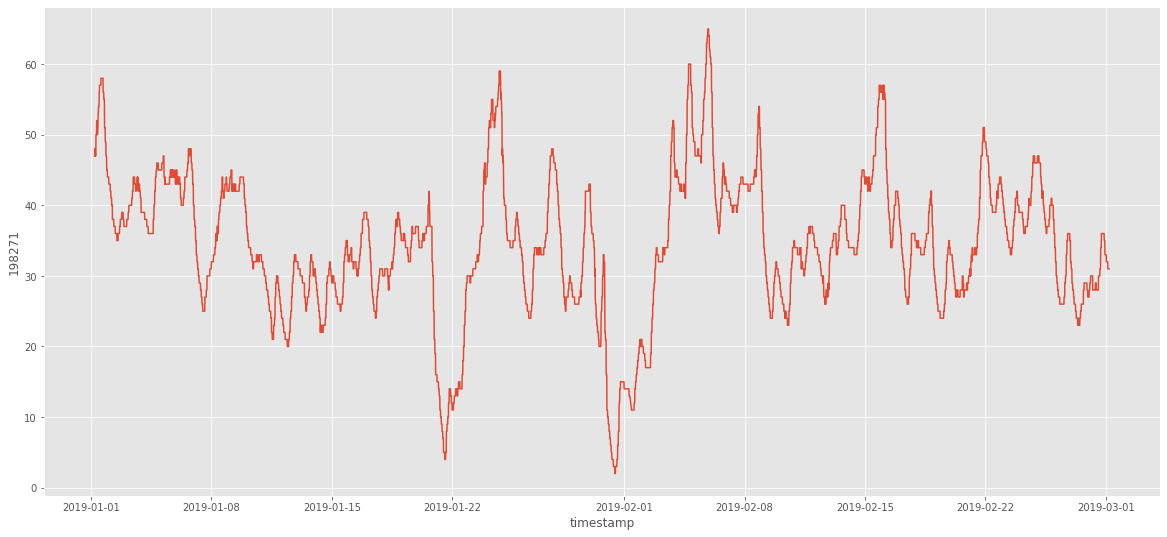

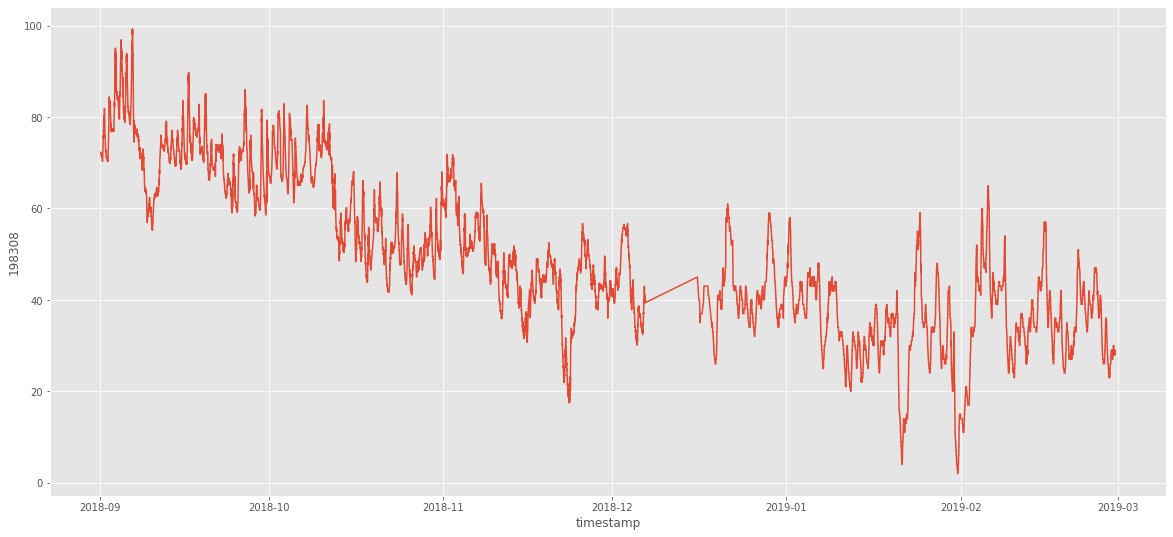

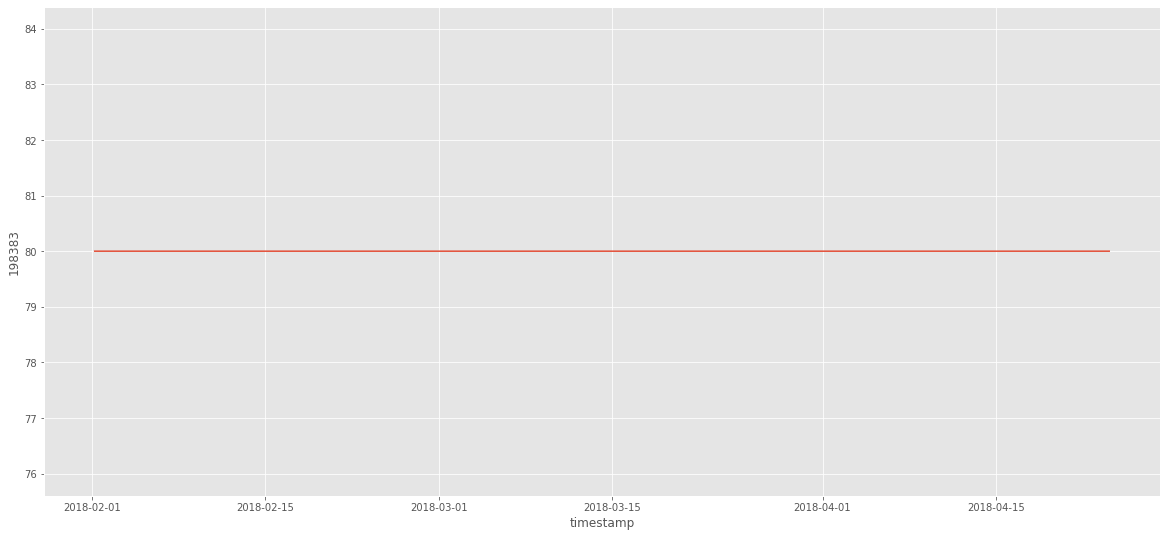

In [40]:
for col in cols:
    plt.figure()
    sns.lineplot(data=data_DSP, x="timestamp", y=col)

In [41]:
# These are the sensors, one per column (first one is the timestamp)
cols = data_DSP_setpoint.columns[1:]
cols

Index(['198237', '198277', '198149', '198188'], dtype='object')

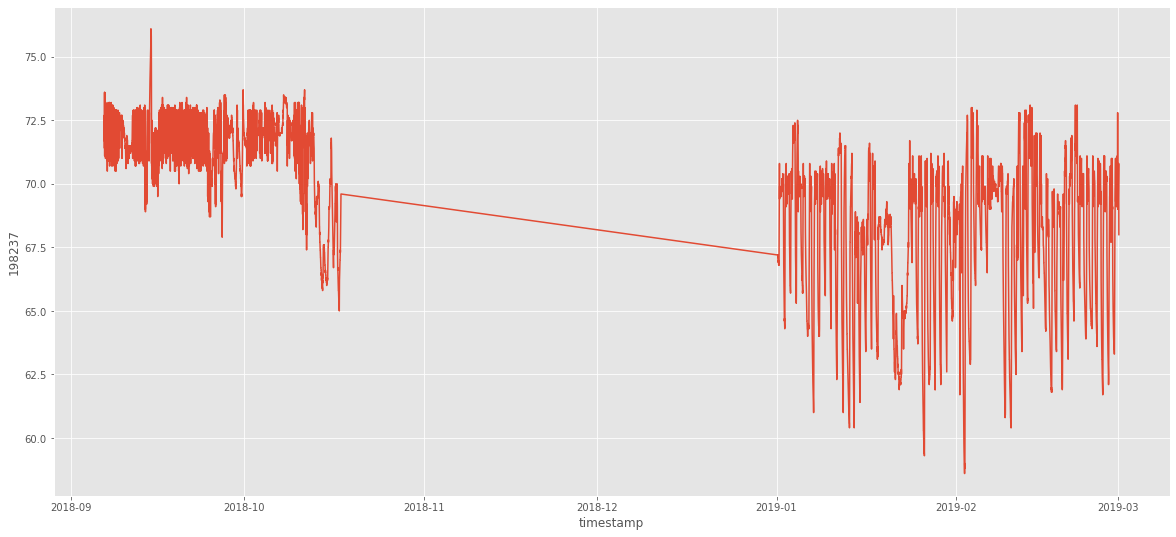

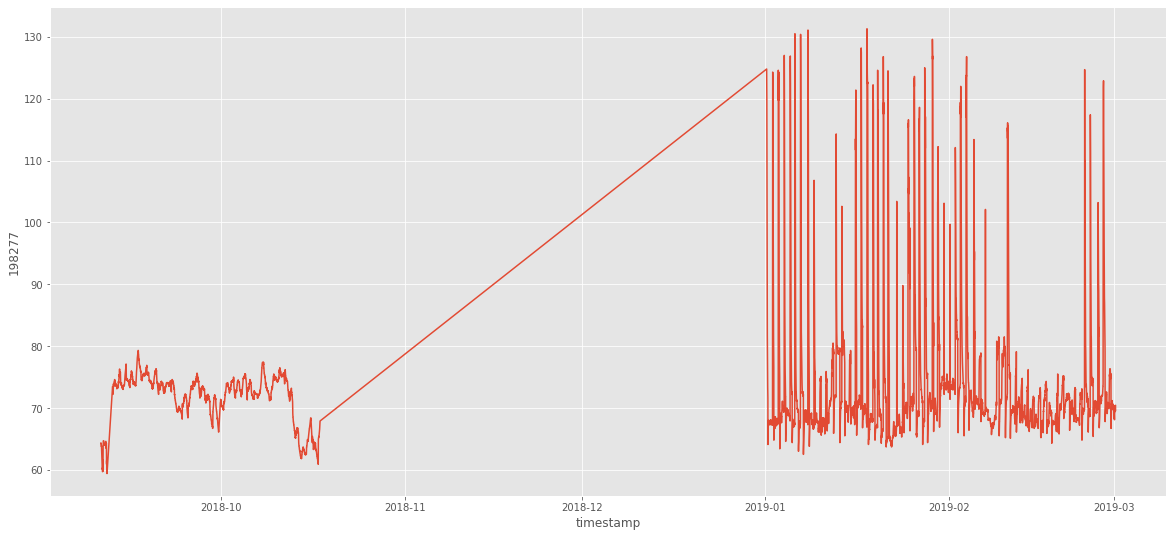

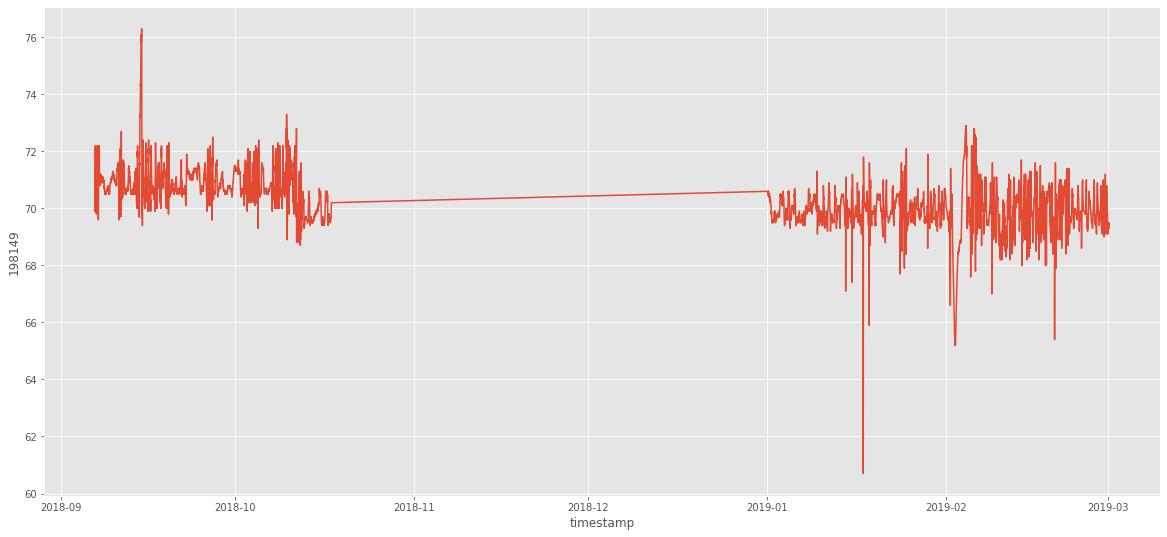

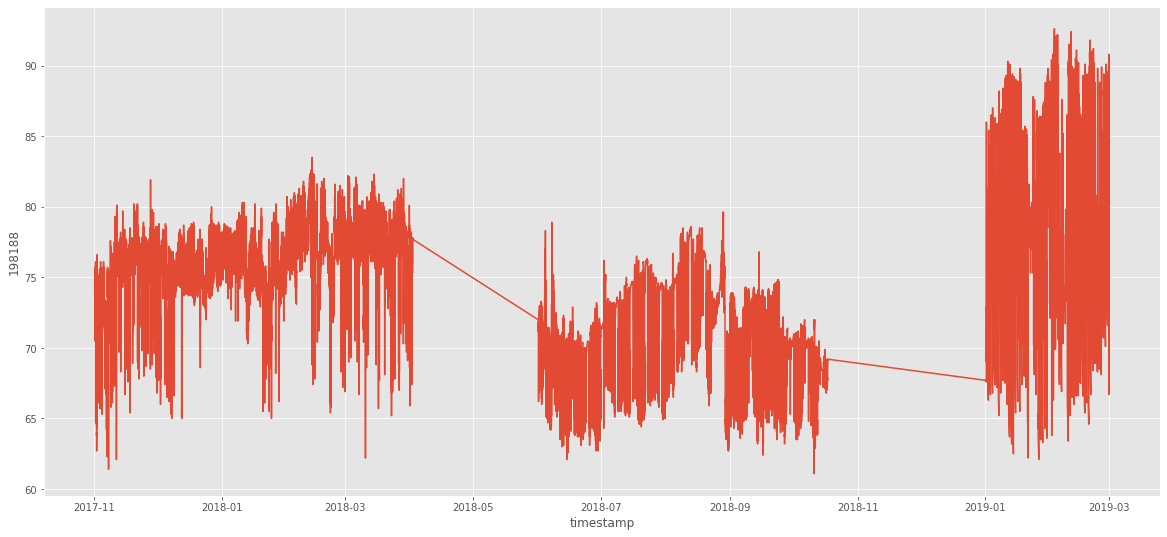

In [42]:
for col in cols:
    plt.figure()
    sns.lineplot(data=data_DSP_setpoint, x="timestamp", y=col)

In [43]:
data_DSP_hour = data_DSP.resample('1H', on="timestamp").mean()
data_DSP_hour.head()

data_DSP_setpoint_hour = data_DSP_setpoint.resample('1H', on="timestamp").mean()
data_DSP_setpoint_hour.head()

,198237,198277,198149,198188
timestamp,,,,
2017-11-01 04:00:00+00:00,NaN,NaN,NaN,74.775
2017-11-01 05:00:00+00:00,NaN,NaN,NaN,74.325
2017-11-01 06:00:00+00:00,NaN,NaN,NaN,71.000
2017-11-01 07:00:00+00:00,NaN,NaN,NaN,70.550
2017-11-01 08:00:00+00:00,NaN,NaN,NaN,71.700


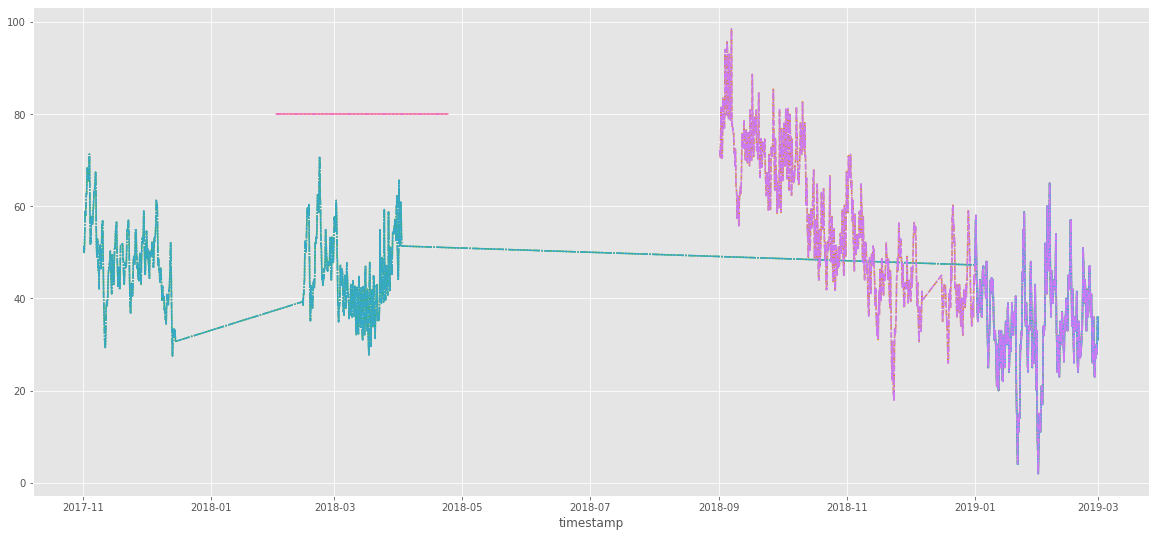

In [44]:
fig = sns.lineplot(data=data_DSP_hour)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)


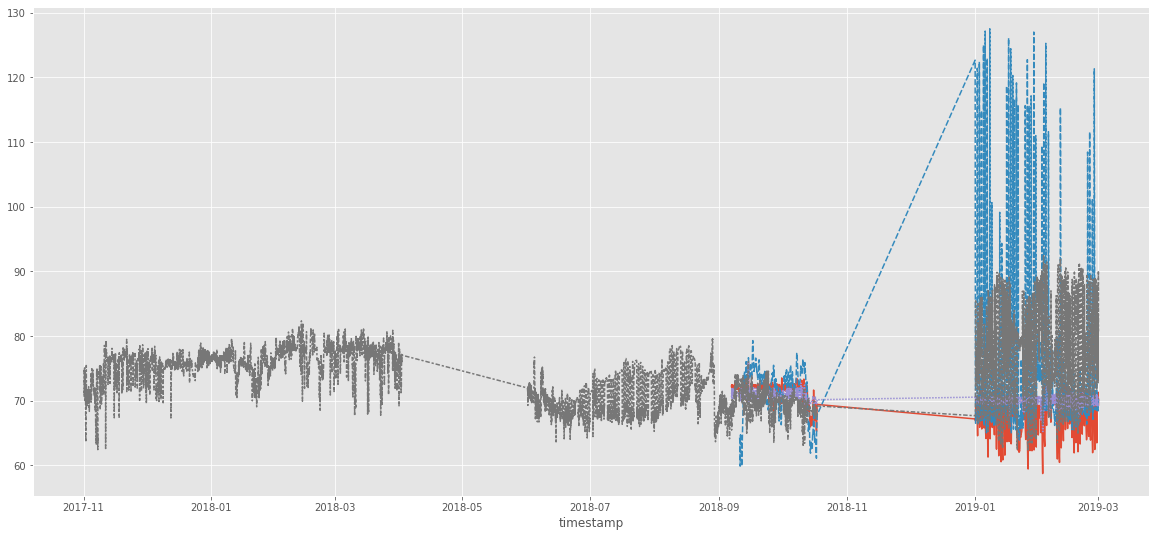

In [45]:
fig = sns.lineplot(data=data_DSP_setpoint_hour)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

In [46]:
data_DSP_day = data_DSP.resample('24H', on="timestamp").mean()
data_DSP_day.head()

,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
timestamp,,,,,,,,,,
2017-11-01 00:00:00+00:00,NaN,NaN,54.027500,NaN,54.027500,NaN,54.027500,NaN,NaN,NaN
2017-11-02 00:00:00+00:00,NaN,NaN,63.516667,NaN,63.516667,NaN,63.516667,NaN,NaN,NaN
2017-11-03 00:00:00+00:00,NaN,NaN,67.467708,NaN,67.467708,NaN,67.467708,NaN,NaN,NaN
2017-11-04 00:00:00+00:00,NaN,NaN,56.255319,NaN,56.255319,NaN,56.255319,NaN,NaN,NaN
2017-11-05 00:00:00+00:00,NaN,NaN,58.132967,NaN,58.132967,NaN,58.132967,NaN,NaN,NaN


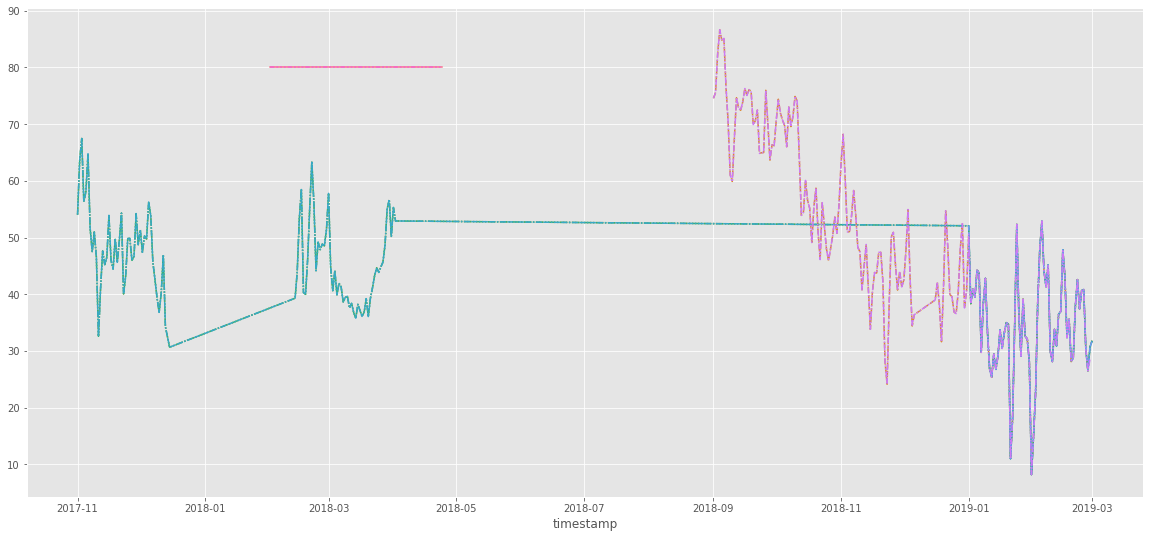

In [47]:
sns.lineplot(data=data_DSP_day)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

In [48]:
data_DSP_setpoint_day = data_DSP_setpoint.resample('24H', on="timestamp").mean()
data_DSP_setpoint_day.head()

,198237,198277,198149,198188
timestamp,,,,
2017-11-01 00:00:00+00:00,NaN,NaN,NaN,72.722500
2017-11-02 00:00:00+00:00,NaN,NaN,NaN,70.028125
2017-11-03 00:00:00+00:00,NaN,NaN,NaN,70.392708
2017-11-04 00:00:00+00:00,NaN,NaN,NaN,71.417708
2017-11-05 00:00:00+00:00,NaN,NaN,NaN,72.677174


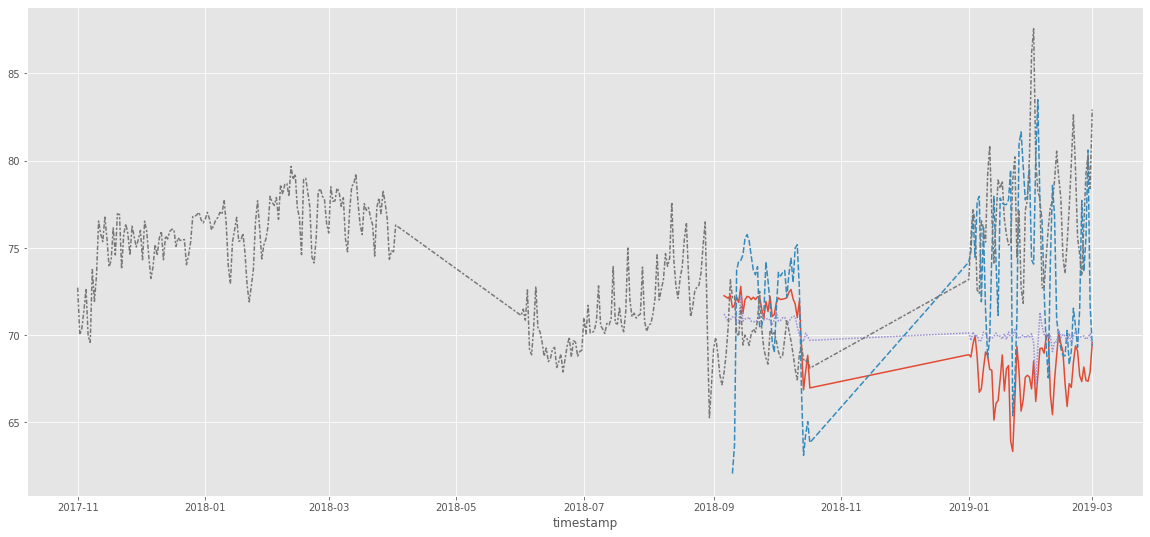

In [49]:
sns.lineplot(data=data_DSP_setpoint_day)

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

<AxesSubplot:xlabel='timestamp', ylabel='198145'>

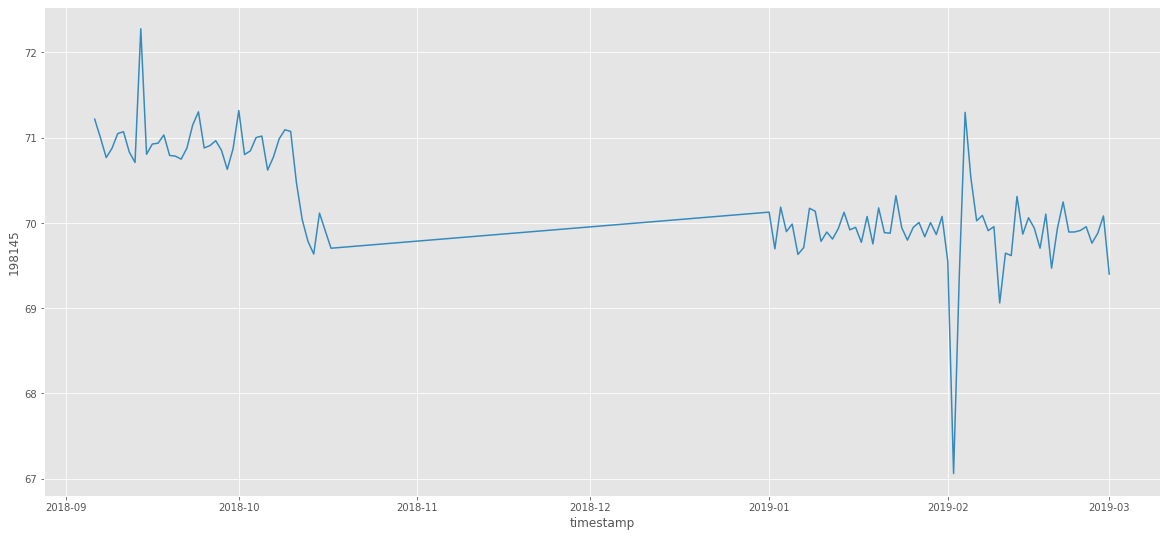

In [51]:
sns.lineplot(data=data_DSP_day['198145'])
sns.lineplot(data=data_DSP_setpoint_day['198149'])

<AxesSubplot:xlabel='timestamp', ylabel='198182'>

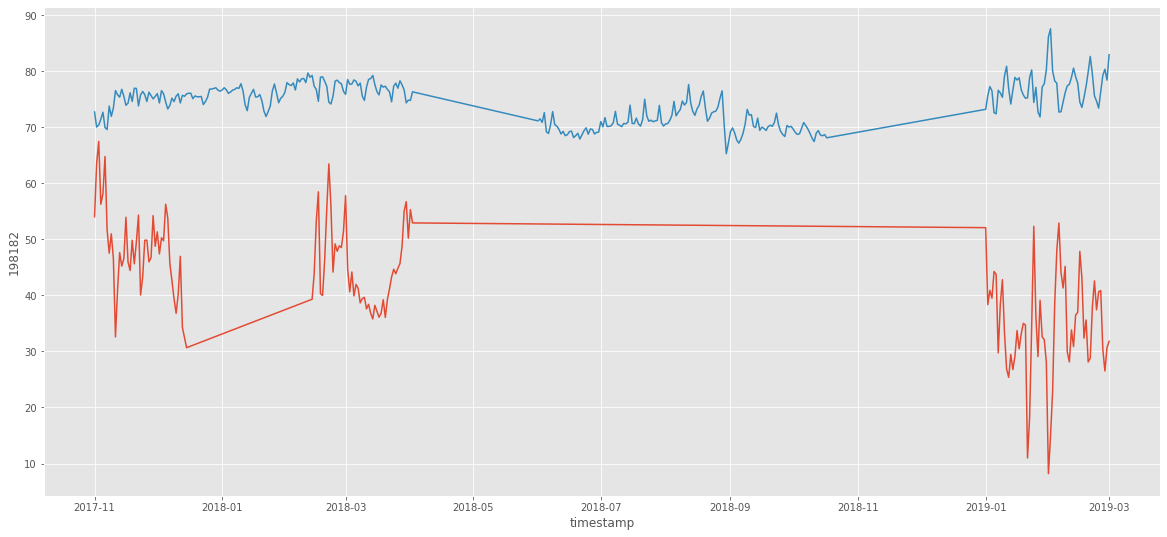

In [55]:
sns.lineplot(data=data_DSP_day['198182'])
sns.lineplot(data=data_DSP_setpoint_day['198188'])

<AxesSubplot:xlabel='timestamp', ylabel='198233'>

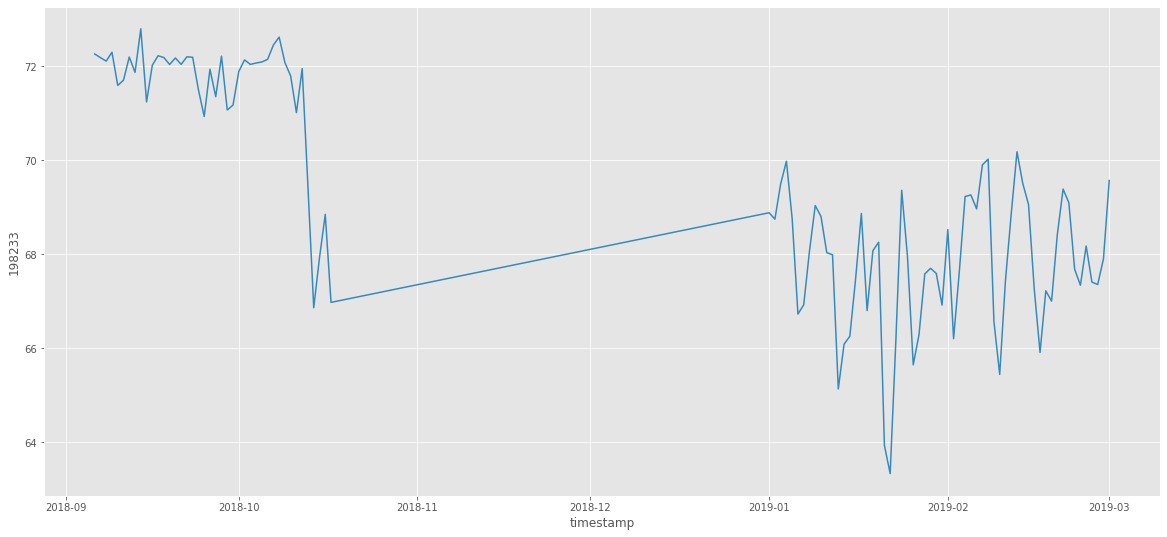

In [56]:
sns.lineplot(data=data_DSP_day['198233'])
sns.lineplot(data=data_DSP_setpoint_day['198237'])

<AxesSubplot:xlabel='timestamp', ylabel='198271'>

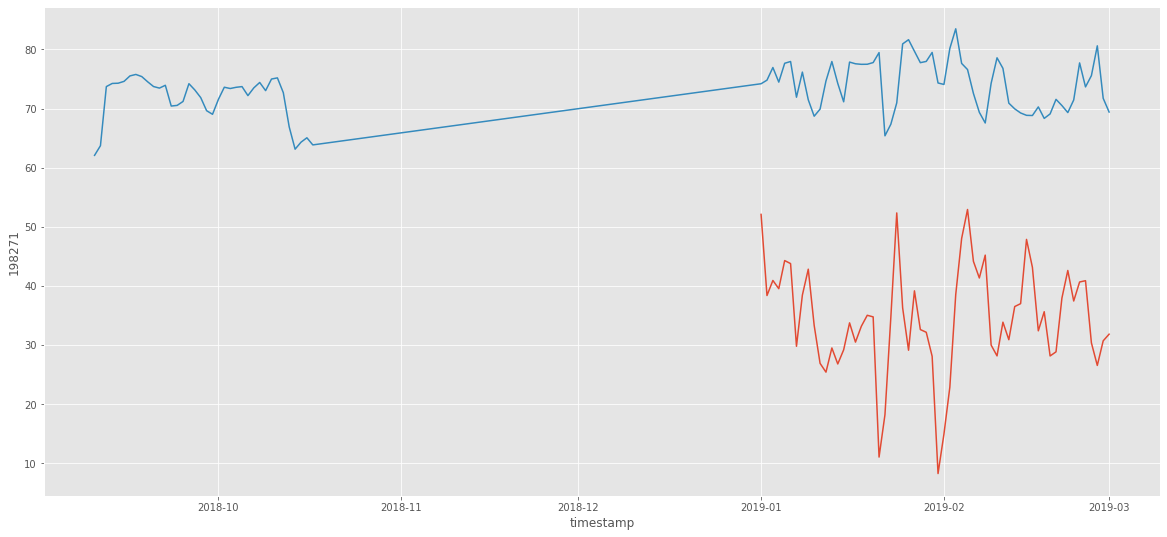

In [73]:
sns.lineplot(data=data_DSP_day['198271'])
sns.lineplot(data=data_DSP_setpoint_day['198277'])

## Heatmaps

Lineplots are easy but still pretty diffcult to visualize. Instead, we can use [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html), it's also really easy. Remember you can transpose your data to change the axis, like this:

And super-easy to plot:

<AxesSubplot:xlabel='timestamp'>

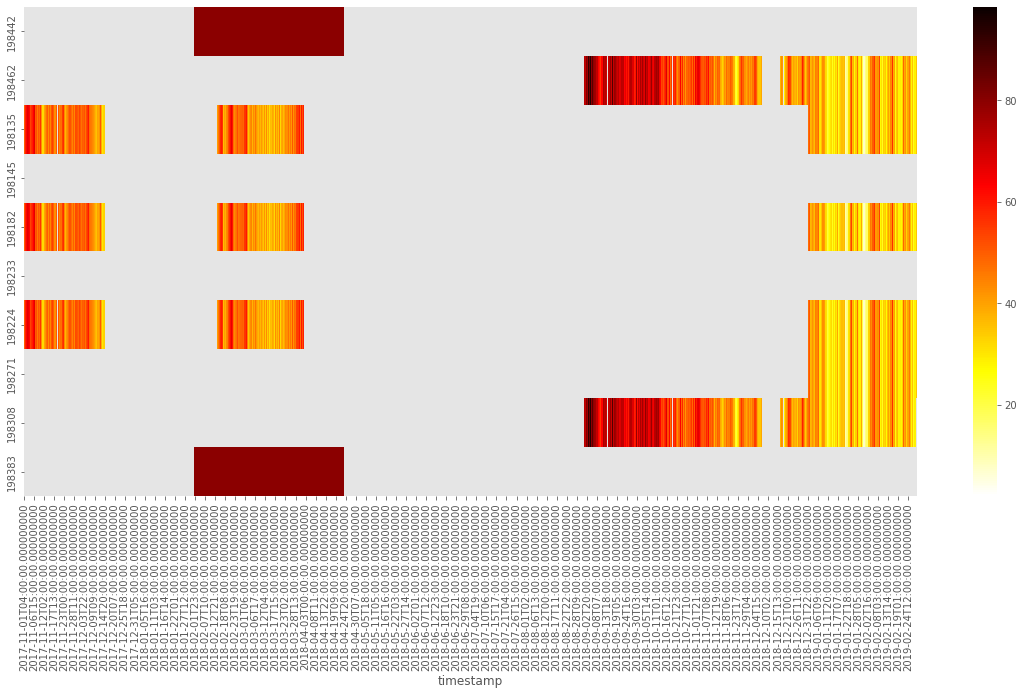

In [57]:
sns.heatmap(data_DSP_hour.T, cmap="hot_r")

<AxesSubplot:xlabel='timestamp'>

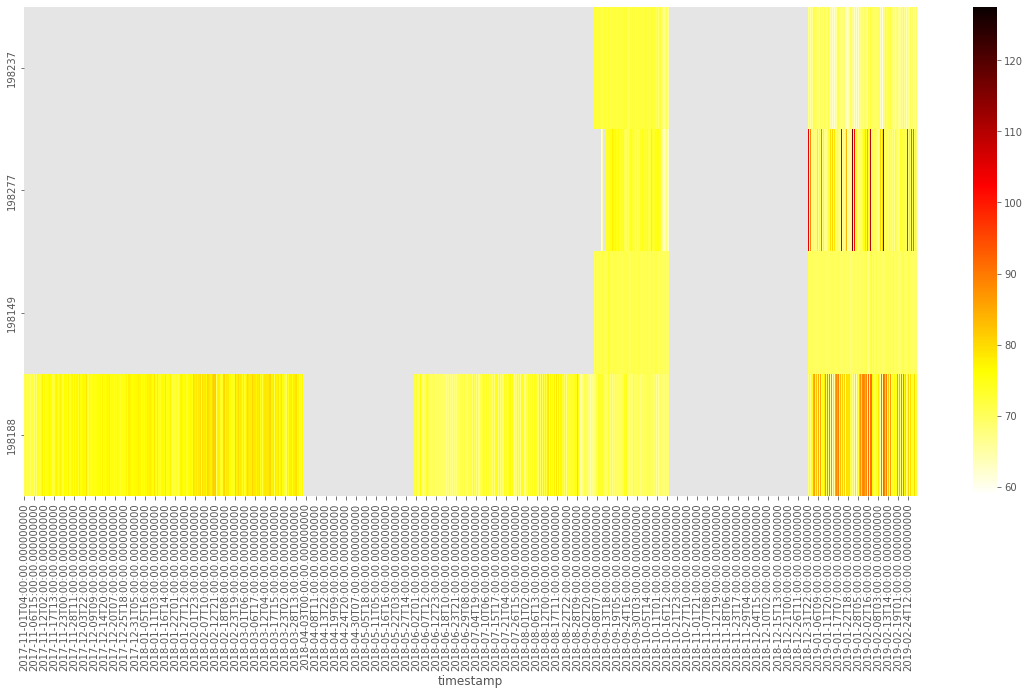

In [58]:
sns.heatmap(data_DSP_setpoint_hour.T, cmap="hot_r")

<AxesSubplot:xlabel='timestamp'>

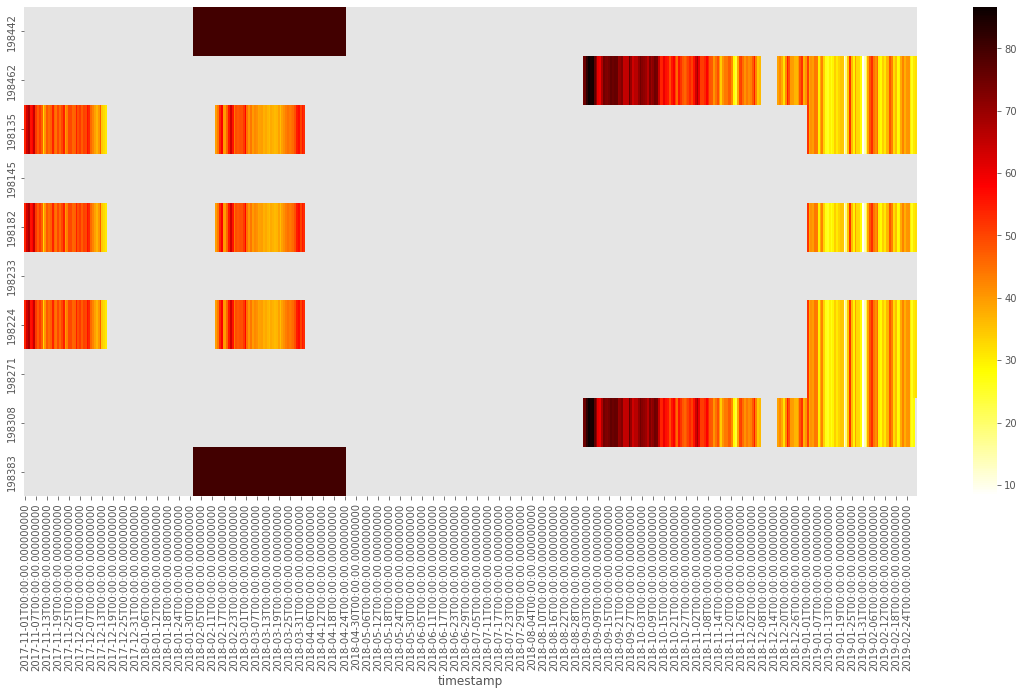

In [59]:
sns.heatmap(data_DSP_day.T, cmap="hot_r")

<AxesSubplot:xlabel='timestamp'>

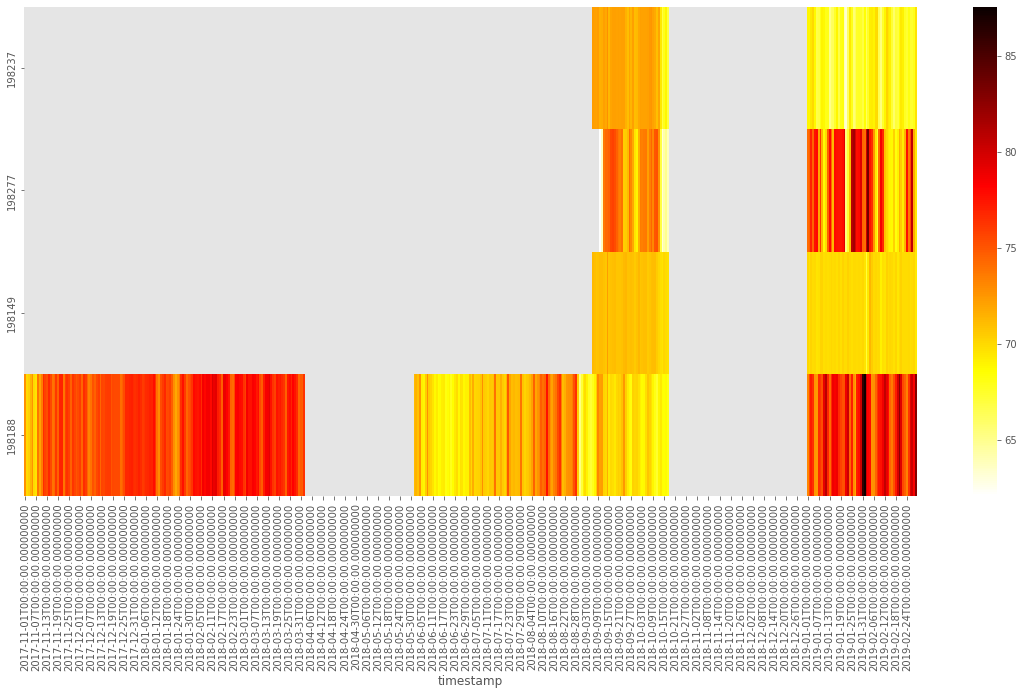

In [60]:
sns.heatmap(data_DSP_setpoint_day.T, cmap="hot_r")

With this kind of plot is pretty evident where we have gaps with no-readings.

# Summary stats

Usually is useful to get some summary stats from our data. Fortunately, pandas has a simple method to obtain them:

In [61]:
data = data_DSP

In [62]:
data.describe()

,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
count,7843.0,16197.000000,14223.000000,0.0,14223.000000,0.0,14223.000000,5650.000000,16125.000000,7843.0
mean,80.0,48.747941,41.766350,NaN,41.766350,NaN,41.766350,34.464779,48.819560,80.0
std,0.0,16.917906,10.744152,NaN,10.744152,NaN,10.744152,9.961970,16.920693,0.0
min,80.0,2.000000,2.000000,NaN,2.000000,NaN,2.000000,2.000000,2.000000,80.0
25%,80.0,36.000000,35.000000,NaN,35.000000,NaN,35.000000,29.000000,36.500000,80.0
50%,80.0,46.000000,42.100000,NaN,42.100000,NaN,42.100000,34.000000,46.000000,80.0
75%,80.0,61.700000,48.600000,NaN,48.600000,NaN,48.600000,41.000000,61.900000,80.0
max,80.0,99.300000,71.400000,NaN,71.400000,NaN,71.400000,65.000000,99.300000,80.0


These stats are usually visualizes in boxplot and histograms; these two plots can be easily obtained with the plotting libraries we are using. But first I suggest processing a little the dataframe to be able to plot all sensors in the same figure. We are using the pandas method [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). We have the data in this way right now:

In [63]:
data.head()

,timestamp,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
0,2017-11-01 04:00:00+00:00,NaN,NaN,51.6,NaN,51.6,NaN,51.6,NaN,NaN,NaN
1,2017-11-01 04:15:00+00:00,NaN,NaN,51.4,NaN,51.4,NaN,51.4,NaN,NaN,NaN
2,2017-11-01 04:30:00+00:00,NaN,NaN,51.1,NaN,51.1,NaN,51.1,NaN,NaN,NaN
3,2017-11-01 04:45:00+00:00,NaN,NaN,50.9,NaN,50.9,NaN,50.9,NaN,NaN,NaN
4,2017-11-01 05:00:00+00:00,NaN,NaN,50.7,NaN,50.7,NaN,50.7,NaN,NaN,NaN


If we use the `melt` method we can convert our columns in rows, creating a new one that indicates which column it was. Is easier seeing the results, check it out:

In [64]:
melted_data = data.melt(id_vars="timestamp", var_name="sensor", value_name="pressure")
melted_data

,timestamp,sensor,pressure
0,2017-11-01 04:00:00+00:00,198442,NaN
1,2017-11-01 04:15:00+00:00,198442,NaN
2,2017-11-01 04:30:00+00:00,198442,NaN
3,2017-11-01 04:45:00+00:00,198442,NaN
4,2017-11-01 05:00:00+00:00,198442,NaN
...,...,...,...
416955,2019-03-01 03:45:00+00:00,198383,NaN
416956,2019-03-01 04:00:00+00:00,198383,NaN
416957,2019-03-01 04:15:00+00:00,198383,NaN
416958,2019-03-01 04:30:00+00:00,198383,NaN


And now that we have the data in this shape, is easy to get a boxplot:

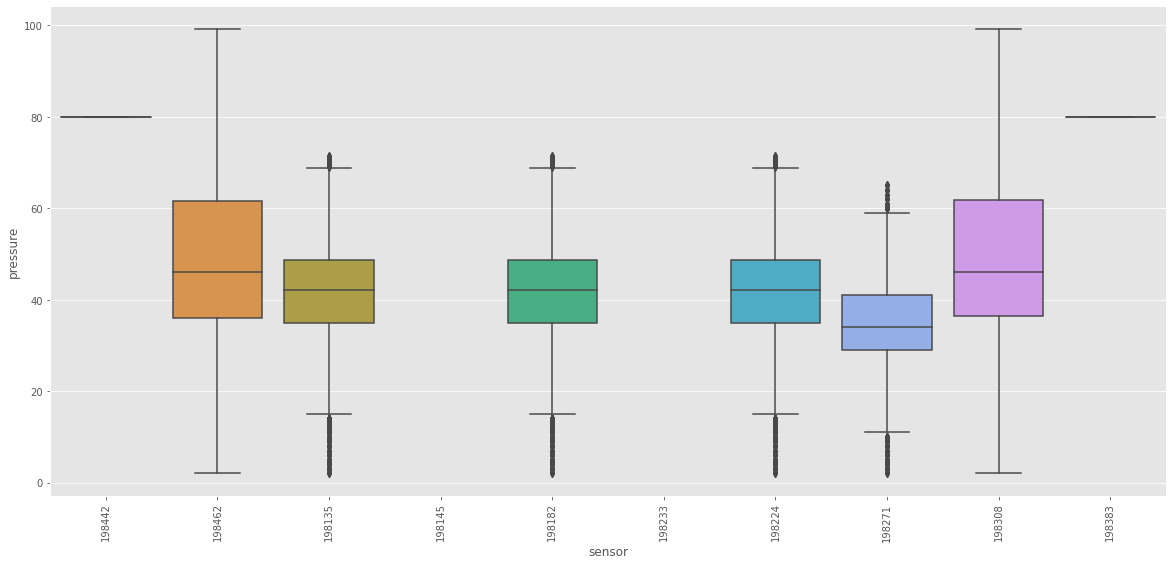

In [65]:
fig = sns.boxplot(y="pressure", x="sensor", data=melted_data)
labels = plt.xticks(rotation=90)

We can also plot an histogram, but with this number of sensors a boxplot is cleaner:

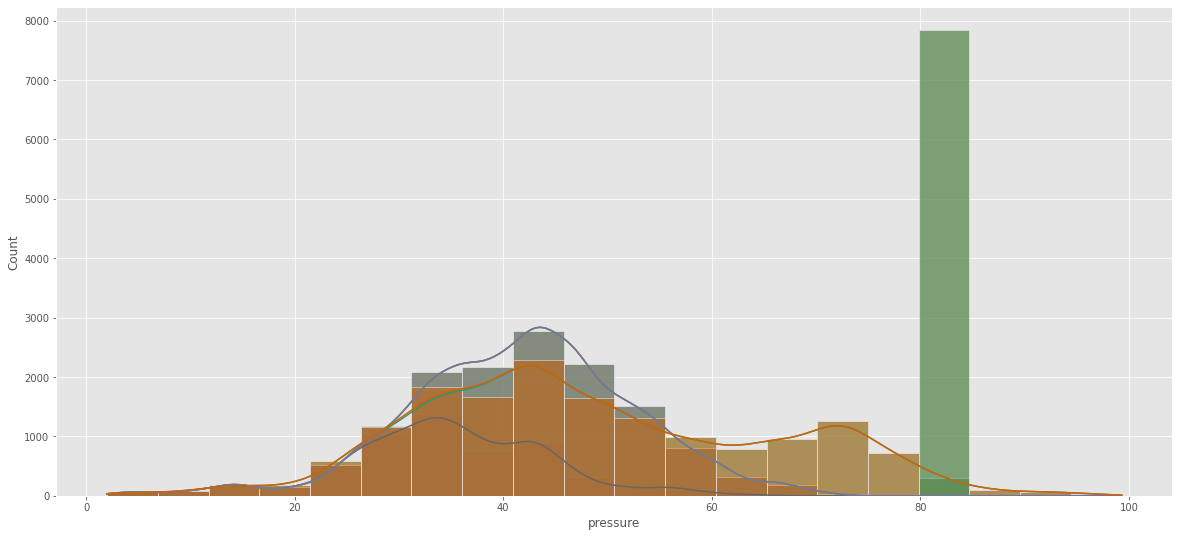

In [66]:
fig = sns.histplot(data=melted_data, x="pressure", hue="sensor", bins=20, kde=True, palette="Dark2")

# This is just for hiding the legend for now, there are a lot of labels and is difficult to see the plot
plt.legend([],[], frameon=False)

Finally, let's create a dataset with the stats. 

In [67]:
stats_data = data.describe()
stats_data

,198442,198462,198135,198145,198182,198233,198224,198271,198308,198383
count,7843.0,16197.000000,14223.000000,0.0,14223.000000,0.0,14223.000000,5650.000000,16125.000000,7843.0
mean,80.0,48.747941,41.766350,NaN,41.766350,NaN,41.766350,34.464779,48.819560,80.0
std,0.0,16.917906,10.744152,NaN,10.744152,NaN,10.744152,9.961970,16.920693,0.0
min,80.0,2.000000,2.000000,NaN,2.000000,NaN,2.000000,2.000000,2.000000,80.0
25%,80.0,36.000000,35.000000,NaN,35.000000,NaN,35.000000,29.000000,36.500000,80.0
50%,80.0,46.000000,42.100000,NaN,42.100000,NaN,42.100000,34.000000,46.000000,80.0
75%,80.0,61.700000,48.600000,NaN,48.600000,NaN,48.600000,41.000000,61.900000,80.0
max,80.0,99.300000,71.400000,NaN,71.400000,NaN,71.400000,65.000000,99.300000,80.0


We are transposing it and reseting the index to keep a column with the point id (was the name of the column):

In [68]:
stats_data = stats_data.T.reset_index().rename(columns={"index":"id_point"})
stats_data

,id_point,count,mean,std,min,25%,50%,75%,max
0,198442,7843.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0
1,198462,16197.0,48.747941,16.917906,2.0,36.0,46.0,61.7,99.3
2,198135,14223.0,41.766350,10.744152,2.0,35.0,42.1,48.6,71.4
3,198145,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,198182,14223.0,41.766350,10.744152,2.0,35.0,42.1,48.6,71.4
5,198233,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,198224,14223.0,41.766350,10.744152,2.0,35.0,42.1,48.6,71.4
7,198271,5650.0,34.464779,9.961970,2.0,29.0,34.0,41.0,65.0
8,198308,16125.0,48.819560,16.920693,2.0,36.5,46.0,61.9,99.3
9,198383,7843.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0


And now let's convert the `id_point` column in our metadata set to string (is an int right now) so we are able to merge with `stats_data`:

In [69]:
metadata['id_point'] = metadata['id_point'].astype(str)

And merge!

In [70]:
stats_merged = pd.merge(stats_data, metadata, how="left", on="id_point")
stats_merged.head()

,id_point,count,mean,std,min,25%,50%,75%,max,building_id,...,measurement_id,datasource_hash,topic,equip_id,id_bdg,name_bdg,equip_type_abbr,equip_type_name,area_served_desc,tags
0,198442,7843.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0,140,...,1,2c64ae13414d3b88b4e10c667f2c8733,nyserda+0000083483+chiller2+Chiller-2_Outdoor ...,18100,140,83483,CH,Chiller,NaN,"['chiller', 'hvac', 'airCooling']"
1,198462,16197.0,48.747941,16.917906,2.0,36.0,46.0,61.7,99.3,140,...,1,364436cf50f651665f53004580af1063,nyserda+0000083483+hotWaterPlant+Heating Plant...,18103,140,83483,HWS,Hot Water Plant,NaN,"['hvac', 'hotWaterPlant']"
2,198135,14223.0,41.766350,10.744152,2.0,35.0,42.1,48.6,71.4,140,...,1,10bd646990542556aa86d3a9236a128e,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
3,198145,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,...,1,d4f8e8a9f1eebcf2ea5c08a68096aee0,nyserda+0000083483+ahu1-gallery+UPCM-1 AH-1 Ga...,18092,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"
4,198182,14223.0,41.766350,10.744152,2.0,35.0,42.1,48.6,71.4,140,...,1,21615a28c7a99344f59571bd65b9eaca,nyserda+0000083483+ahu1-lobby+AH-1 Lobby_OA Te...,18093,140,83483,AHU,Air Handling Unit,NaN,"['ahu', 'hvac']"


In [71]:
metadata.T

,0,1,2,3,4,5,6,7,8,9,...,44380,44381,44382,44383,44384,44385,44386,44387,44388,44389
id_point,310029,310009,310010,310011,310012,310013,310014,310015,310016,310017,...,231135,231134,231133,231132,231131,359906,359905,231120,231119,231118
building_id,441,441,441,441,441,441,441,441,441,441,...,399,399,399,399,399,399,399,399,399,399
last_updated,1560571200000.0,1560485100000.0,1560571200000.0,1560485100000.0,1560485100000.0,1560485100000.0,1560485100000.0,1560485100000.0,1550528400000.0,1560485100000.0,...,1596253500000.0,1596253500000.0,1596253500000.0,1559360700000.0,1559360700000.0,1596253500000.0,1589532300000.0,1543639500000.0,1559360700000.0,1552639500000.0
first_updated,1550541661000.0,1550700900000.0,1550503775000.0,1550503800000.0,1550503800000.0,1550504100000.0,1550504100000.0,1550504100000.0,1550504100000.0,1550504100000.0,...,1529335800000.0,1543640400000.0,1529335800000.0,1543640400000.0,1527825600000.0,1580533200000.0,1580533200000.0,1528909200000.0,1543640400000.0,1546232400000.0
device,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
objectId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name_point,245 E 149th St. Boiler-1 Fault Code,225 E 149th St. Boiler-1 Exhaust Temp,225 E 149th St. Boiler-1 Fault Code,225 E 149th St. Boiler-1 FFWD Temp,225 E 149th St. Boiler-1 Fire Rate In,225 E 149th St. Boiler-1 Fire Rate Out,225 E 149th St. Boiler-1 Flame Strength,225 E 149th St. Boiler-1 Inlet Temp,225 E 149th St. Boiler-1 Net Remote Setpt,225 E 149th St. Boiler-1 Outlet Temp,...,CWST_value,CWRT_status,CWRT_value,CWP Power_status,CWP Power_value,Main Meter kW_v1,Main Meter kW_v0,Building Demand_value,Building Demand_v1,Building Demand_v0
description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CWST_value,CWRT_status,CWRT_value,CWP Power_status,CWP Power_value,NaN,NaN,Building Demand_value,Building Demand_v1,Building Demand_v0
units,?,F,?,?,?,?,?,?,?,?,...,F,NaN,F,NaN,kW,NaN,NaN,kW,kW,kW
tagged_units,?,f,?,?,?,?,?,?,?,?,...,f,?,f,?,kw,kw,kw,?,?,?


Finally, plot! we want to visualize the mean temperature of the points, colored by the building name.

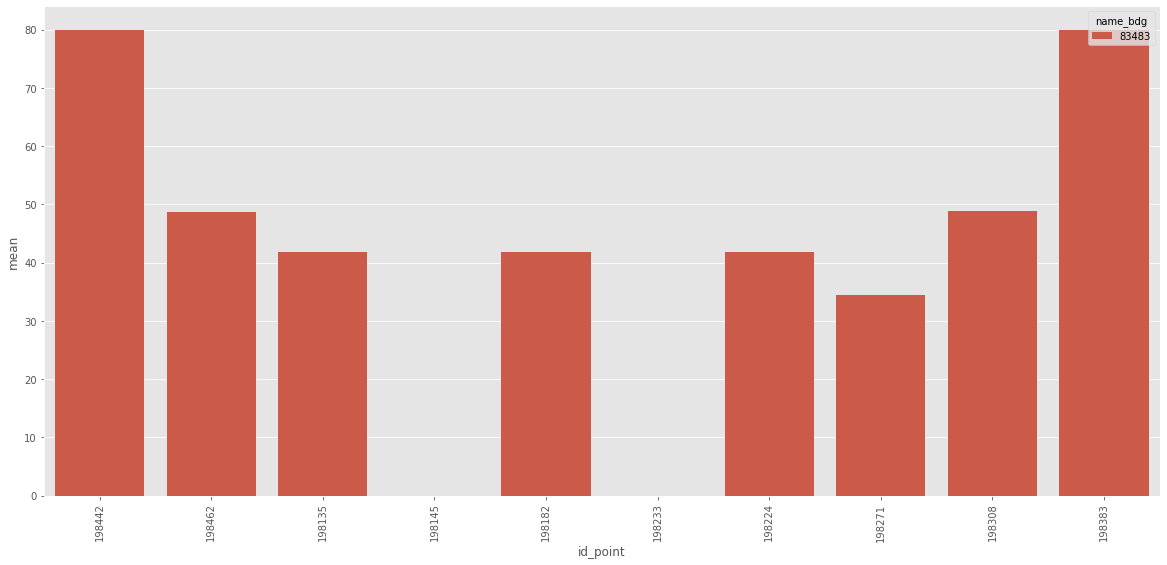

In [72]:
fig = sns.barplot(data=stats_merged, x="id_point", y="mean", hue="name_bdg", dodge=False)
labels = plt.xticks(rotation=90)